In [1]:
# importas
import csv
import os
import pathlib
from collections import namedtuple
from time import time
from typing import List, Tuple, Optional
from random import randint, seed

import networkx as nx
import numpy as np
import torch
import torch_geometric.utils as tutils
from torch_geometric.data import Data
from torch_geometric.datasets import TUDataset
from tqdm import tqdm

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from grakel.kernels import WeisfeilerLehman, VertexHistogram, ShortestPath
from grakel import GraphKernel
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit

from utils import load_singleton_graphs_from_TUDataset

import warnings
warnings.filterwarnings('ignore')

/home/anthonygillioz/Documents/graph_library/graph_reduction/filter_reduction/venv/lib64/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'utils'

In [ ]:
# Parameters
datasets = [

    'AIDS', 'BZR', 'BZR_MD', 'COX2', 'COX2_MD', 'DHFR', 'DHFR_MD', 'ER_MD', 'MUTAG',
    'Mutagenicity', 'NCI1', 'NCI109', 'PTC_FM', 'PTC_FR', 'PTC_MM', 'PTC_MR',
    'DD', 'ENZYMES', 'KKI', 'OHSU', 'Peking_1', 'PROTEINS_full', 'MSRC_9', 'MSRC_21',
    'FRANKENSTEIN', 'PROTEINS', 'COIL-DEL', 'COIL-RAG', 'Letter-high', 'Letter-low', 'Letter-med',
    'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'REDDIT-BINARY', 'REDDIT-MULTI-5K', 'REDDIT-MULTI-12K',
]
seed(42)
seeds = [randint(0, 10000) for _ in range(10)]

In [3]:
# CONSTANTS
NODE_ATTRIBUTE = 'x'

CLF_METHODS = {
    'knn': (KNeighborsClassifier, {'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11]}),
    'rbf': (SVC, {'svc__gamma': np.logspace(-6, 2, 9),
                  'svc__C': np.logspace(-2, 2, 5)})
}


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_jobs = 10
cv = 5
verbose = False

results = {}

for dataset in datasets[:2]:
    print(dataset)

    graphs, labels = load_singleton_graphs_from_TUDataset(root=os.path.join('root', dataset),
                                                          dataset=dataset,
                                                          node_attr=NODE_ATTRIBUTE)
    
    for clf_name, clf in CLF_METHODS.items():
        clf_method, param_grid = clf

        accuracies = []
        

        for c_seed in seeds:
            
            G_train, G_test, y_train, y_test = train_test_split(graphs,
                                                                labels,
                                                                test_size=0.2,
                                                                random_state=c_seed,
                                                                stratify=labels)
            pipe_clf = make_pipeline(StandardScaler(),
                                     clf_method())
            clf = GridSearchCV(estimator=pipe_clf,
                                param_grid=param_grid,
                                n_jobs=n_jobs,
                                cv=cv,
                                verbose=int(verbose)*3)
            
            


            clf.fit(G_train, y_train)
            accuracies.append(clf.score(G_test, y_test))
        
        print(f'{dataset}, {clf_name}: {np.mean(accuracies)*100:.2f} +- {np.std(accuracies)*100:.2f}')
    print('='*60)

ENZYMES


Convert graph to singleton: 100%|██████████| 600/600 [00:00<00:00, 11916.71it/s]

37
3
torch.Size([37, 3])
23
3
torch.Size([23, 3])
25
3
torch.Size([25, 3])
24
3
torch.Size([24, 3])
23
3
torch.Size([23, 3])
24
3
torch.Size([24, 3])
26
3
torch.Size([26, 3])
88
3
torch.Size([88, 3])
23
3
torch.Size([23, 3])
32
3
torch.Size([32, 3])
4
3
torch.Size([4, 3])
14
3
torch.Size([14, 3])
42
3
torch.Size([42, 3])
41
3
torch.Size([41, 3])
36
3
torch.Size([36, 3])
55
3
torch.Size([55, 3])
40
3
torch.Size([40, 3])
38
3
torch.Size([38, 3])
2
3
torch.Size([2, 3])
35
3
torch.Size([35, 3])
42
3
torch.Size([42, 3])
41
3
torch.Size([41, 3])
39
3
torch.Size([39, 3])
42
3
torch.Size([42, 3])
41
3
torch.Size([41, 3])
40
3
torch.Size([40, 3])
37
3
torch.Size([37, 3])
23
3
torch.Size([23, 3])
22
3
torch.Size([22, 3])
34
3
torch.Size([34, 3])
38
3
torch.Size([38, 3])
38
3
torch.Size([38, 3])
39
3
torch.Size([39, 3])
8
3
torch.Size([8, 3])
23
3
torch.Size([23, 3])
42
3
torch.Size([42, 3])
42
3
torch.Size([42, 3])
100
3
torch.Size([100, 3])
24
3
torch.Size([24, 3])
24
3
torch.Size([24, 3])
47
3

ENZYMES, knn: 37.75 +- 4.17
ENZYMES, rbf: 40.08 +- 3.38
DD


Convert graph to singleton:  71%|███████   | 839/1178 [00:00<00:00, 8385.71it/s]

327
89
torch.Size([327, 89])
351
89
torch.Size([351, 89])
188
89
torch.Size([188, 89])
108
89
torch.Size([108, 89])
174
89
torch.Size([174, 89])
4152
89
torch.Size([4152, 89])
1396
89
torch.Size([1396, 89])
503
89
torch.Size([503, 89])
377
89
torch.Size([377, 89])
146
89
torch.Size([146, 89])
312
89
torch.Size([312, 89])
237
89
torch.Size([237, 89])
315
89
torch.Size([315, 89])
277
89
torch.Size([277, 89])
224
89
torch.Size([224, 89])
452
89
torch.Size([452, 89])
257
89
torch.Size([257, 89])
221
89
torch.Size([221, 89])
151
89
torch.Size([151, 89])
351
89
torch.Size([351, 89])
5748
89
torch.Size([5748, 89])
697
89
torch.Size([697, 89])
340
89
torch.Size([340, 89])
68
89
torch.Size([68, 89])
255
89
torch.Size([255, 89])
431
89
torch.Size([431, 89])
363
89
torch.Size([363, 89])
258
89
torch.Size([258, 89])
393
89
torch.Size([393, 89])
242
89
torch.Size([242, 89])
557
89
torch.Size([557, 89])
173
89
torch.Size([173, 89])
435
89
torch.Size([435, 89])
220
89
torch.Size([220, 89])
344
89
tor

Convert graph to singleton: 100%|█████████| 1178/1178 [00:00<00:00, 5824.97it/s]


52
89
torch.Size([52, 89])
171
89
torch.Size([171, 89])
DD, knn: 77.63 +- 2.34
DD, rbf: 78.60 +- 2.34


# Idea:

Check the how much info is contained in the singleton node data.

TSNE and plot with classes

In [4]:
import matplotlib.pyplot as plt
from collections.abc import Iterable
from tqdm.auto import tqdm
from sklearn.manifold import TSNE

In [43]:
def tsne_viz(graphs: np.ndarray,
             labels: np.ndarray,
             *args,
             perps: List[int] = [30],
             **kwargs) -> Tuple[plt.Figure, List[plt.Axes]]:

    fig, axes = plt.subplots(1, len(perps), figsize=(5*len(perps), 5))
    if not isinstance(axes, Iterable):
        axes = [axes]
    for ax, perp in tqdm(zip(axes.flat, perps), total=len(perps)):
        if len(graphs) < perp:
            continue
        viz = TSNE(perplexity=perp, init="pca", n_jobs=8)
        embedding = viz.fit_transform(graphs)
        
        for i in np.unique(labels):
            
            ax.scatter(*embedding[np.where(labels==i)].T, *args, **kwargs, 
                   #cmap=plt.cm.get_cmap('tab10', len(set(labels))),
                   #cmap='viridis',
                   #edgecolor='black',
                       marker='o')
        ax.set_title(f"TSNE perplexity: {perp}, kl: {viz.kl_divergence_:.3f}", fontsize=15)
    fig.tight_layout()
    plt.show()


In [44]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

AIDS


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 16885.35it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

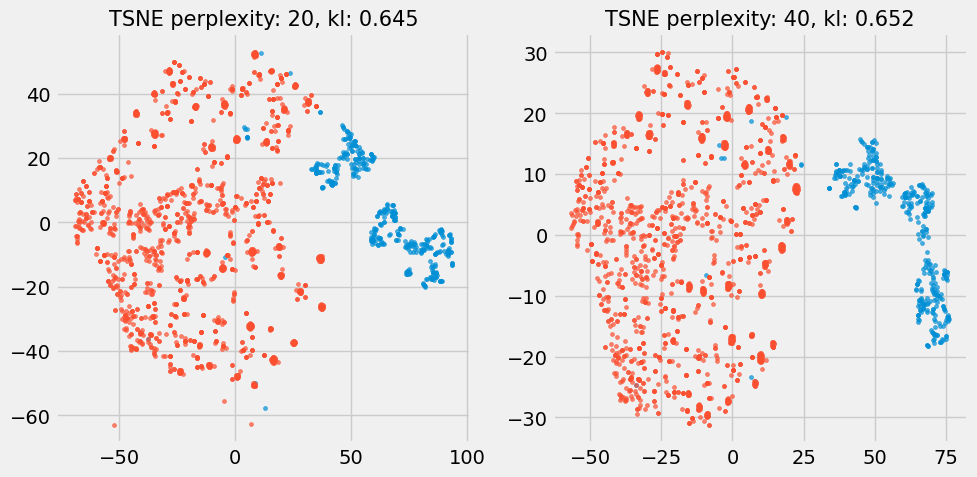

BZR


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 405/405 [00:00<00:00, 17222.01it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

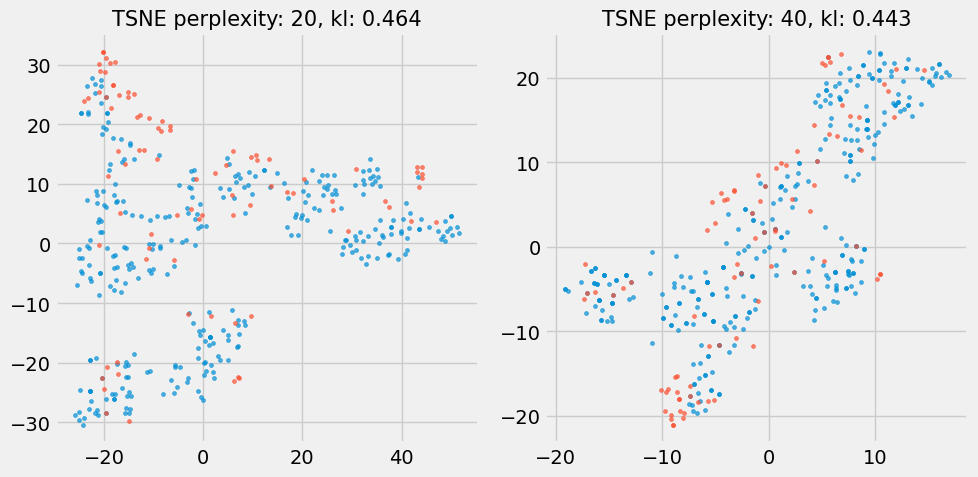

BZR_MD


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 306/306 [00:00<00:00, 16356.02it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

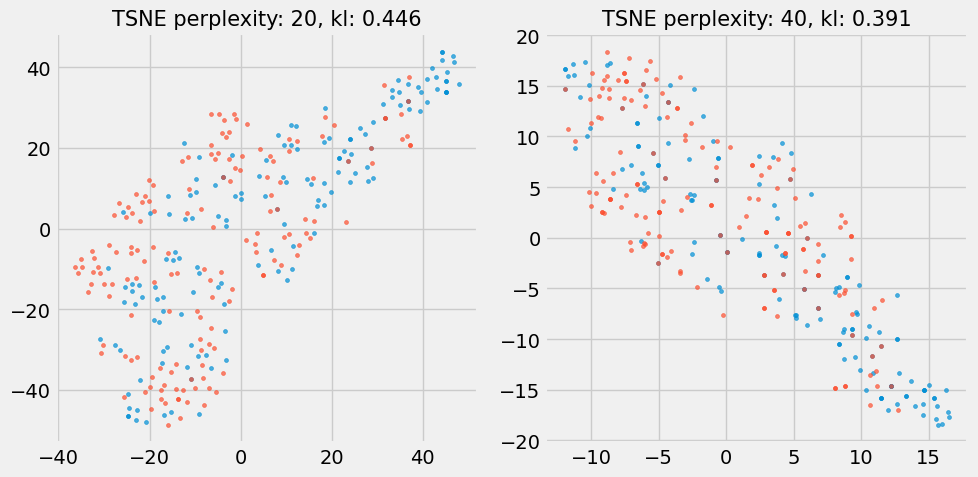

COX2


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 467/467 [00:00<00:00, 17633.60it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

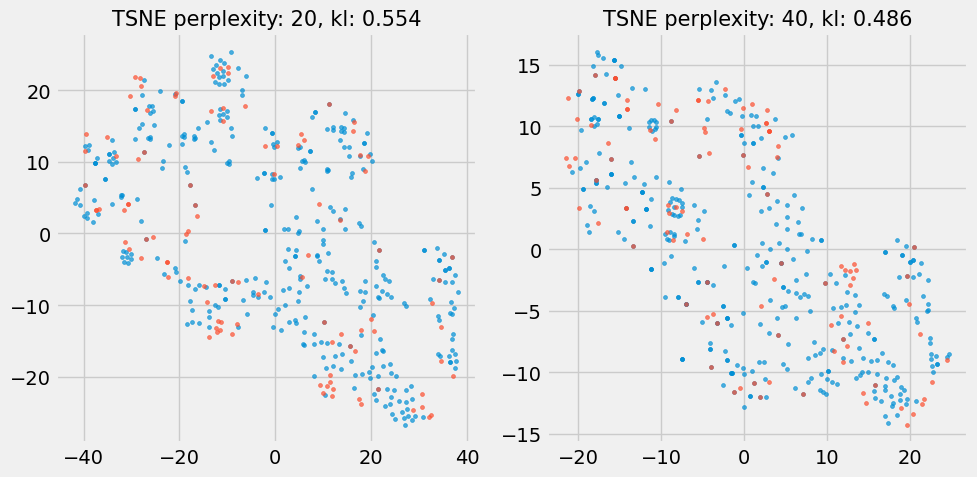

COX2_MD


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 303/303 [00:00<00:00, 14580.10it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

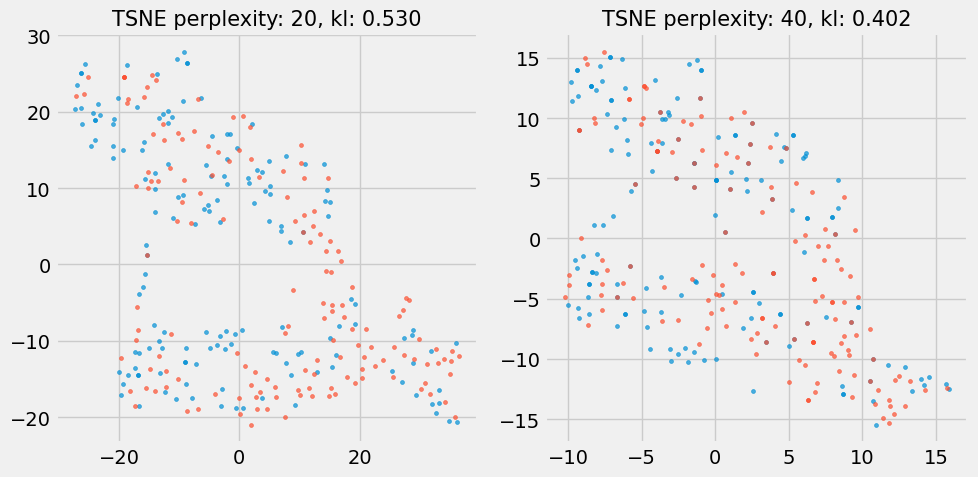

DHFR


Convert graph to singleton: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 756/756 [00:00<00:00, 2558.89it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

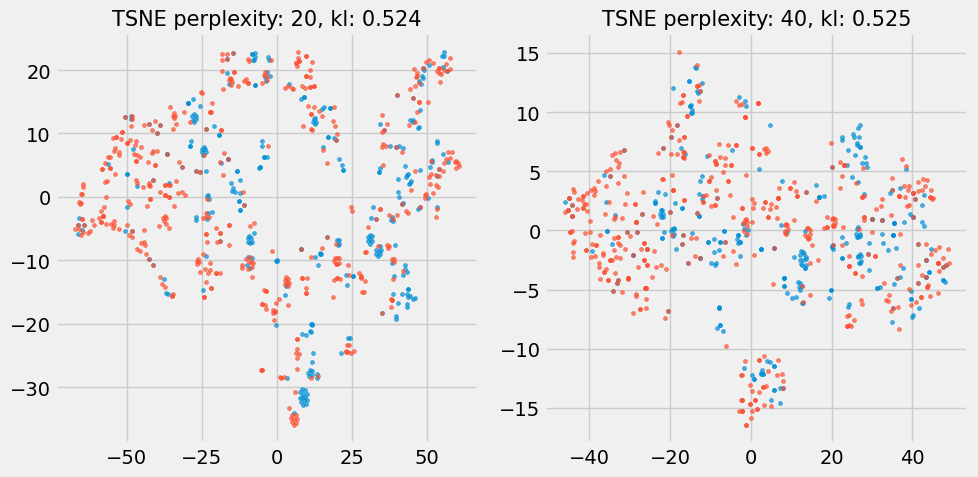

DHFR_MD


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 393/393 [00:00<00:00, 15344.59it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

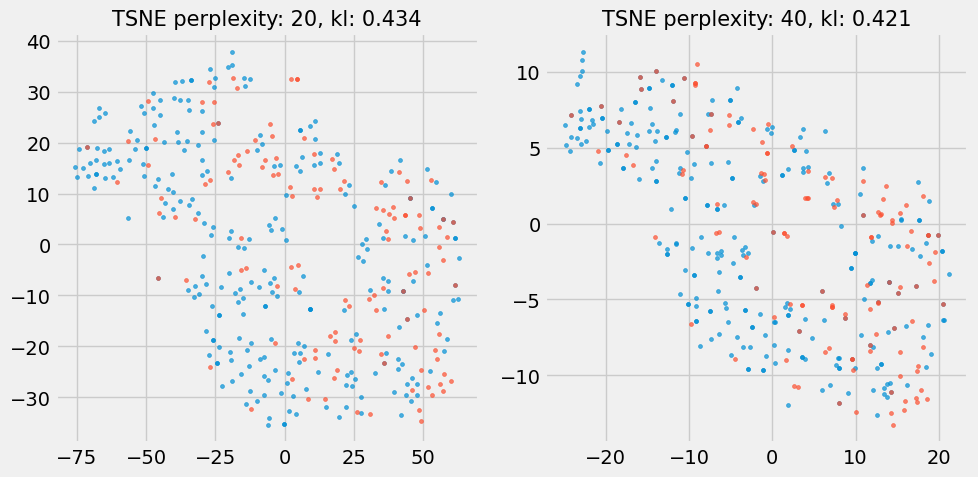

ER_MD


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 446/446 [00:00<00:00, 15997.16it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

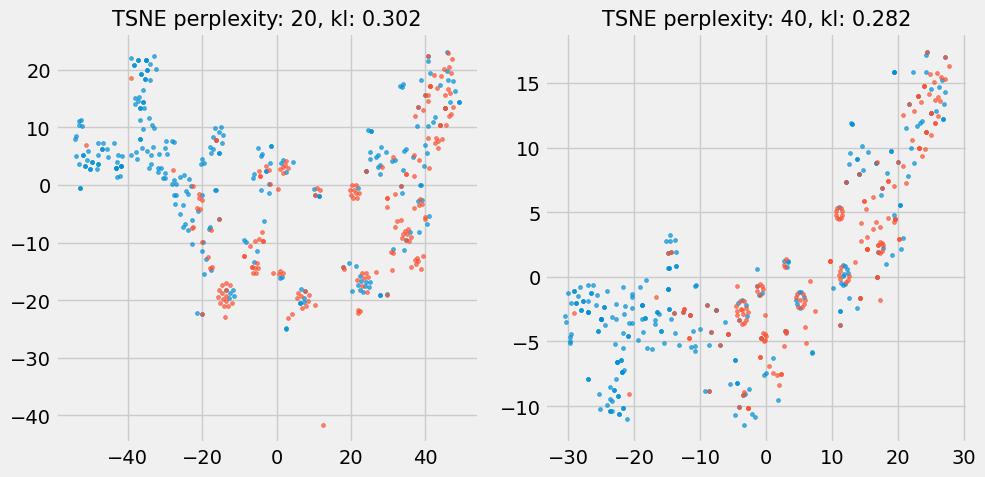

MUTAG


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 15927.95it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

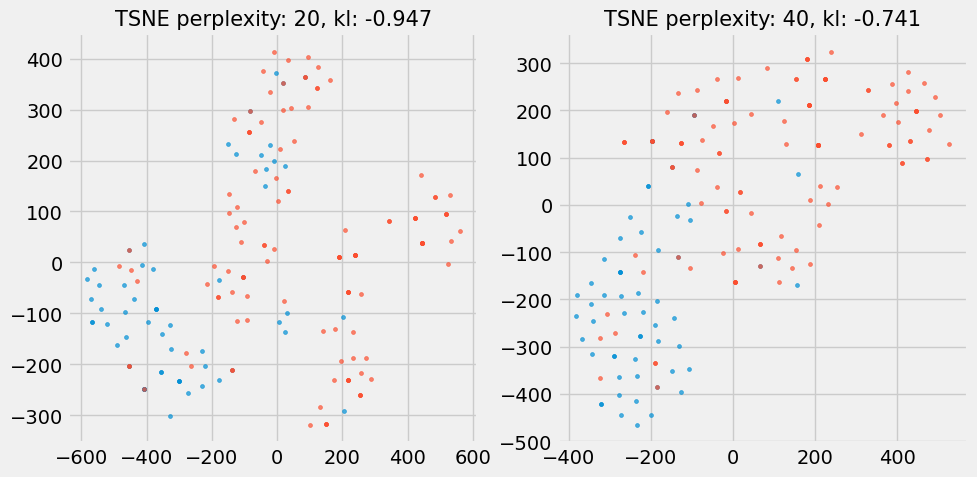

Mutagenicity


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 4337/4337 [00:00<00:00, 15753.07it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

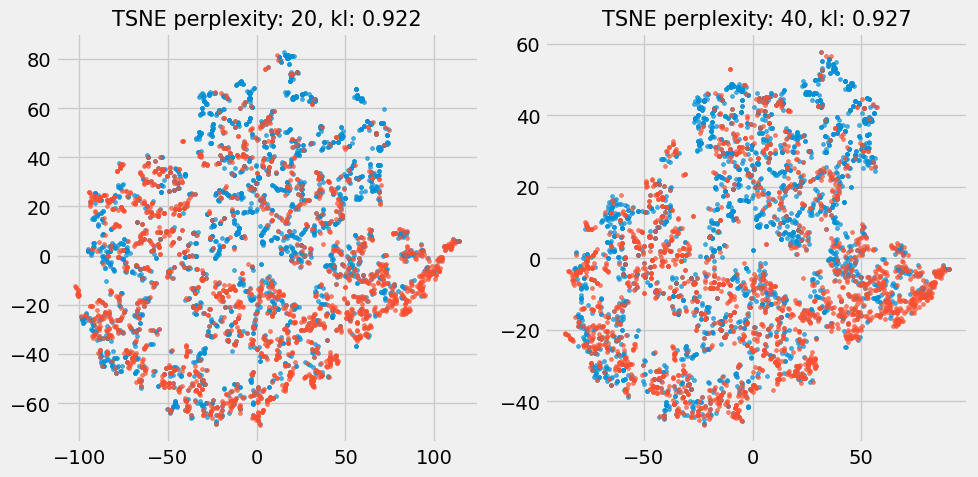

NCI1


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 4110/4110 [00:00<00:00, 17825.36it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

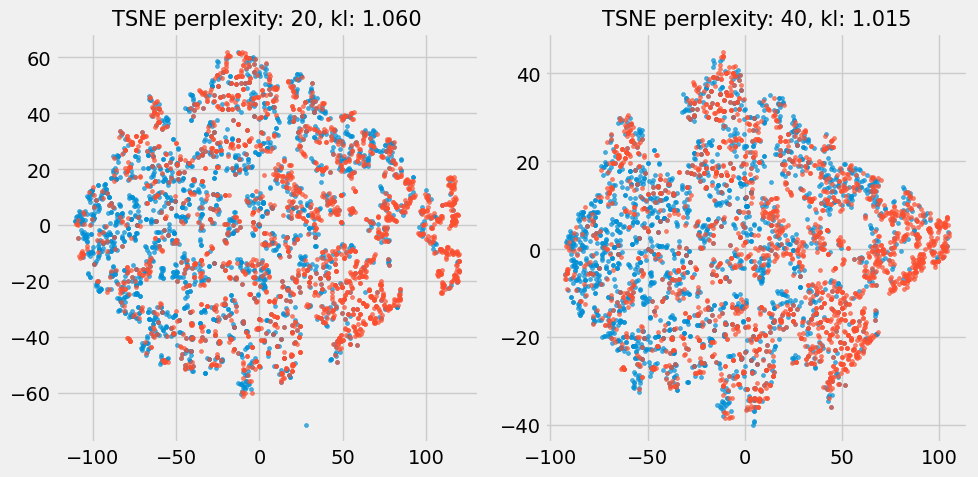

NCI109


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 4127/4127 [00:00<00:00, 16379.19it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

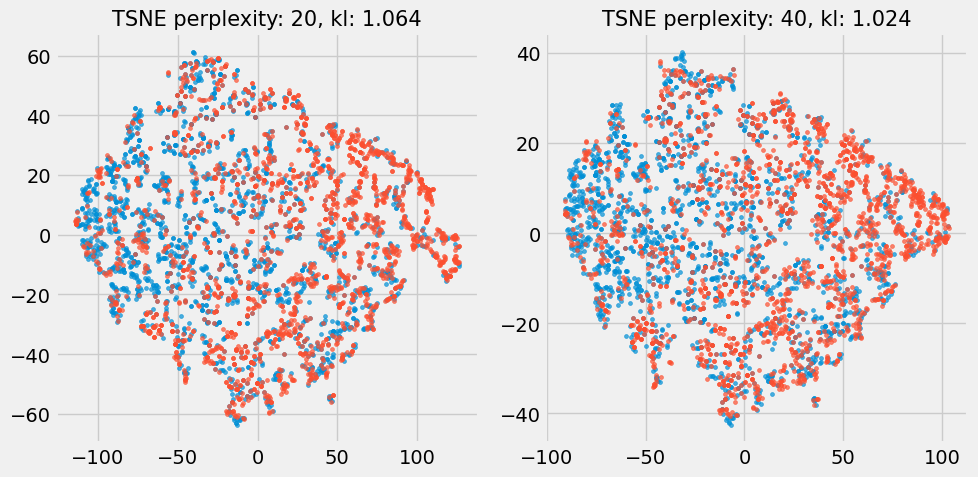

PTC_FM


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 349/349 [00:00<00:00, 16270.36it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

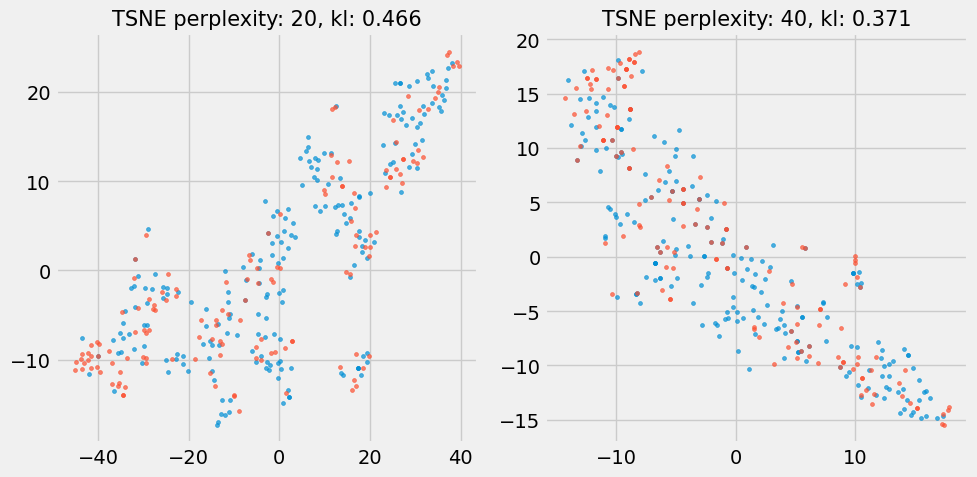

PTC_FR


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 351/351 [00:00<00:00, 16871.81it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

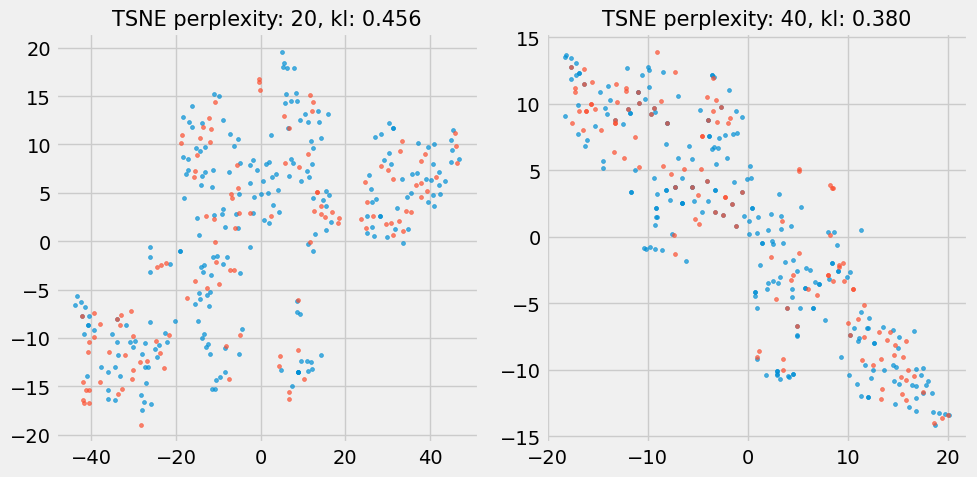

PTC_MM


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 14316.34it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

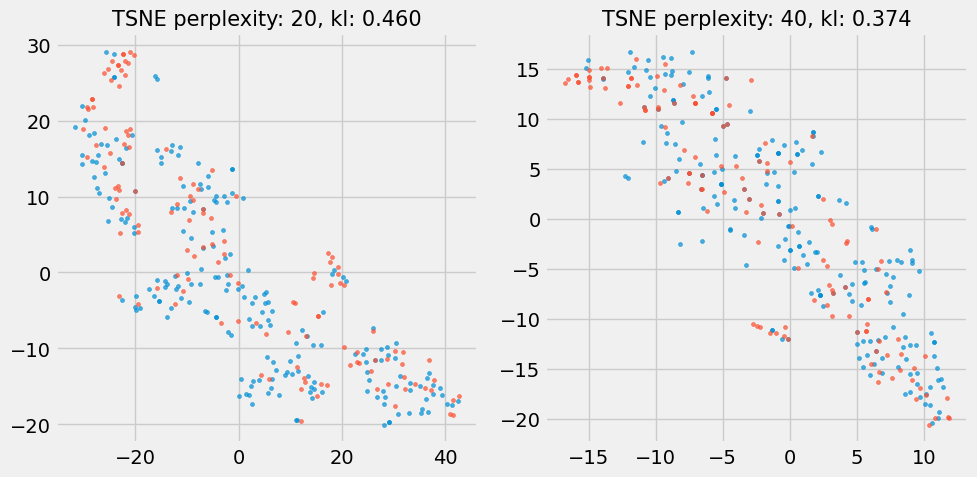

PTC_MR


Convert graph to singleton: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 344/344 [00:00<00:00, 1201.77it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

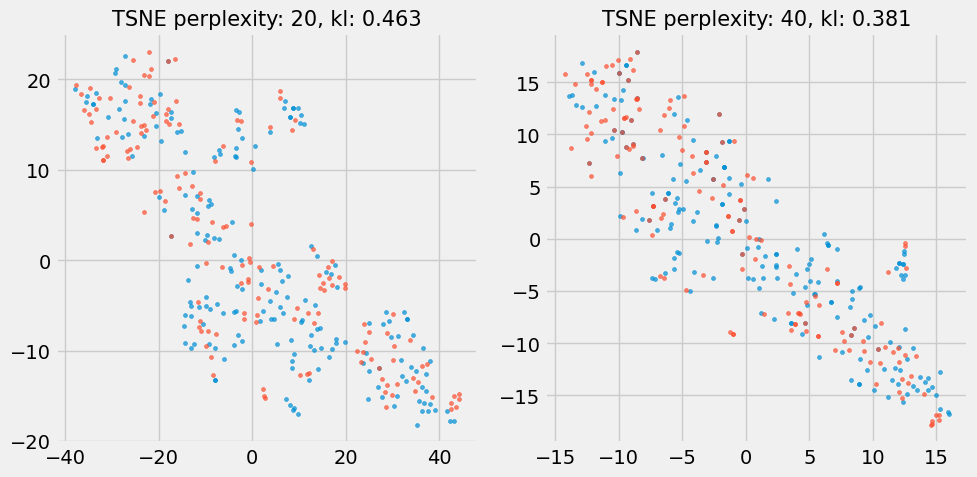

DD


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1178/1178 [00:00<00:00, 16115.21it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

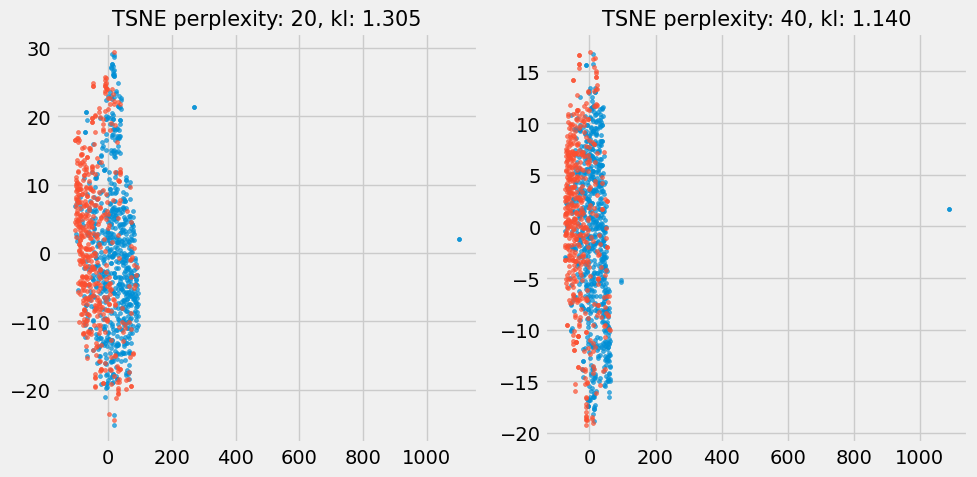

ENZYMES


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 16519.73it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

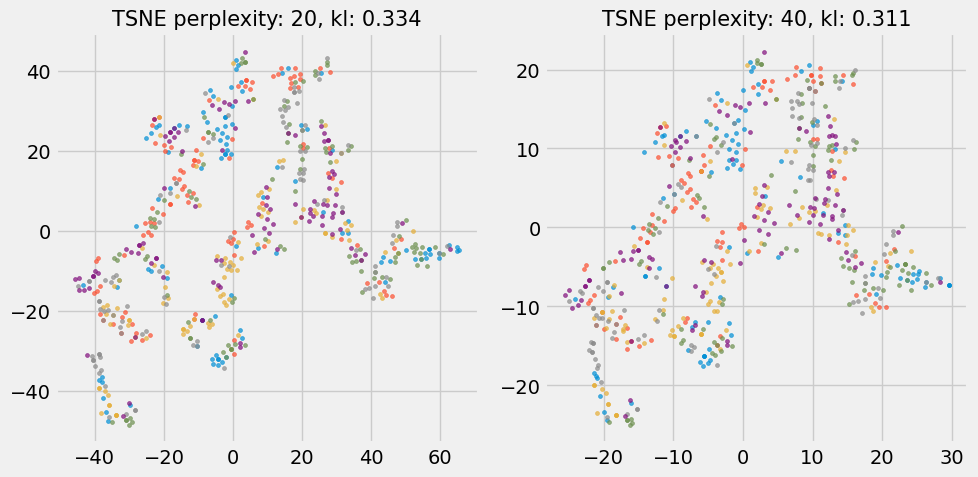

KKI


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 83/83 [00:00<00:00, 16724.02it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

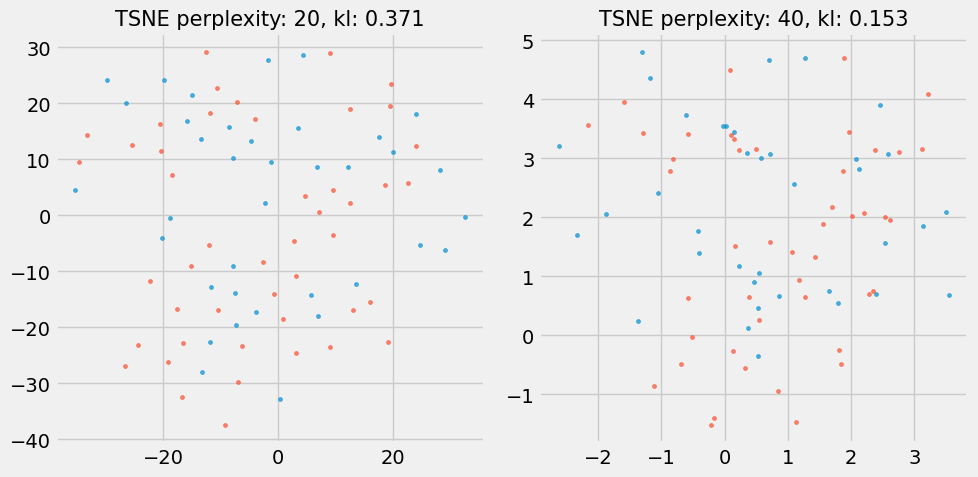

OHSU


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 13952.75it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

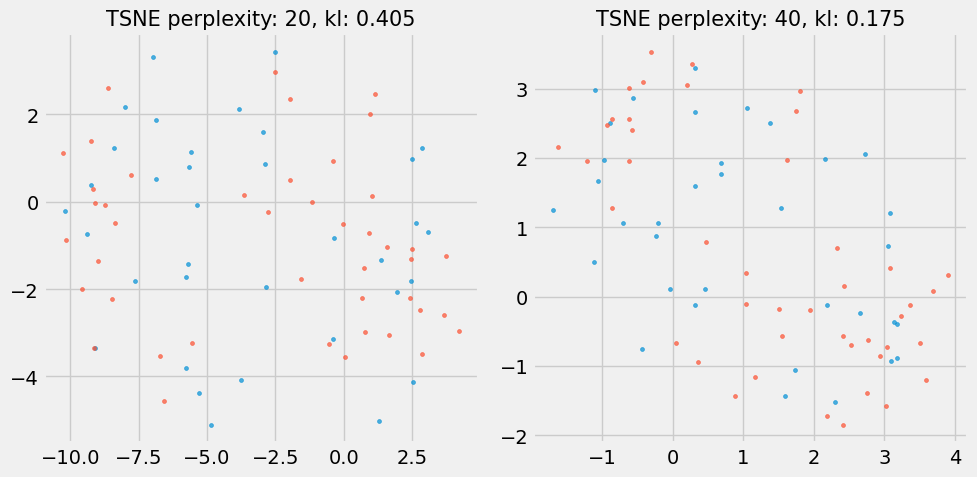

Peking_1


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 85/85 [00:00<00:00, 12702.31it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

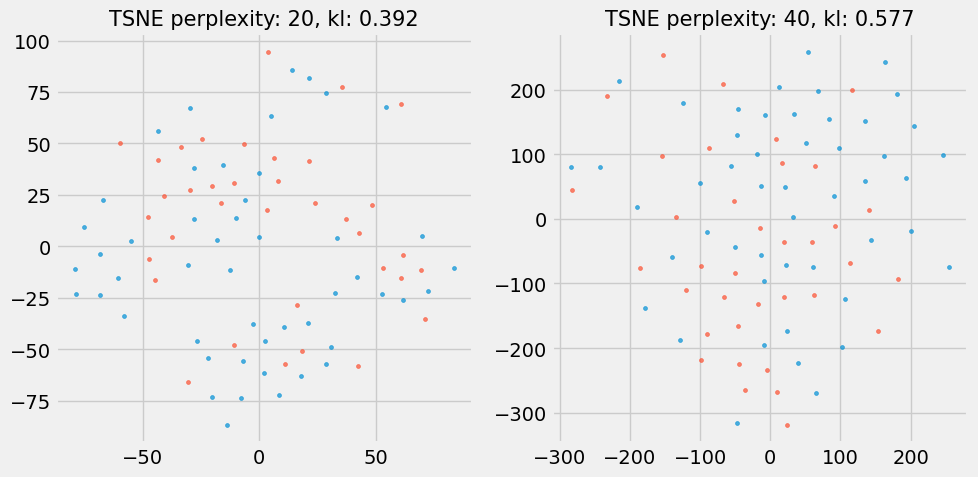

PROTEINS_full


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1113/1113 [00:00<00:00, 16379.75it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

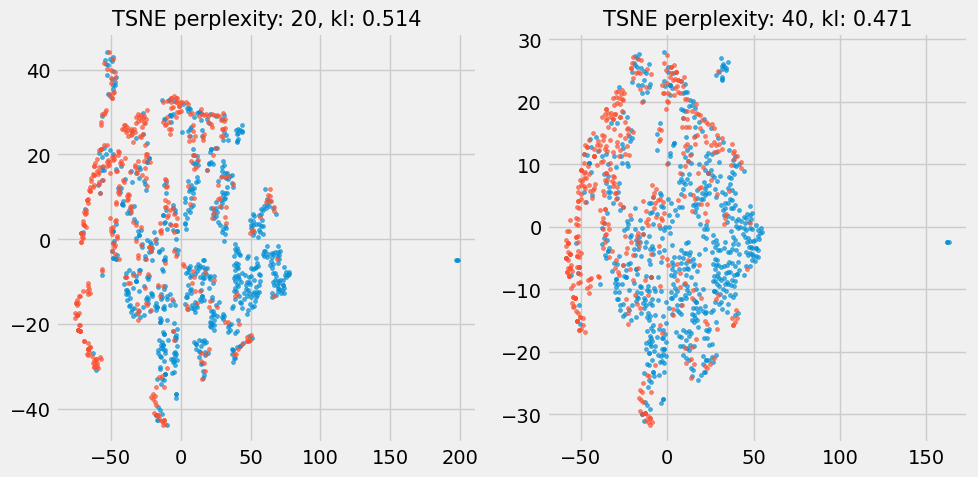

MSRC_9


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:00<00:00, 17125.62it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

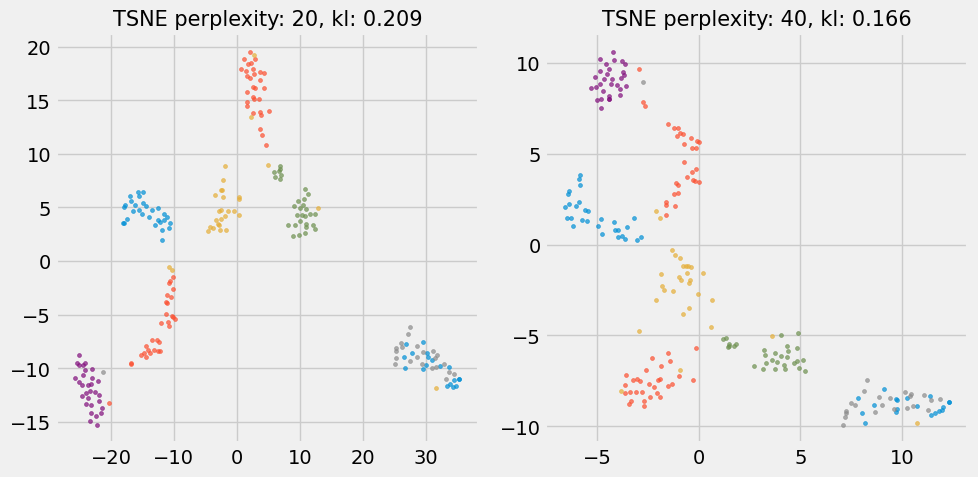

MSRC_21


Convert graph to singleton: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 563/563 [00:00<00:00, 17831.52it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

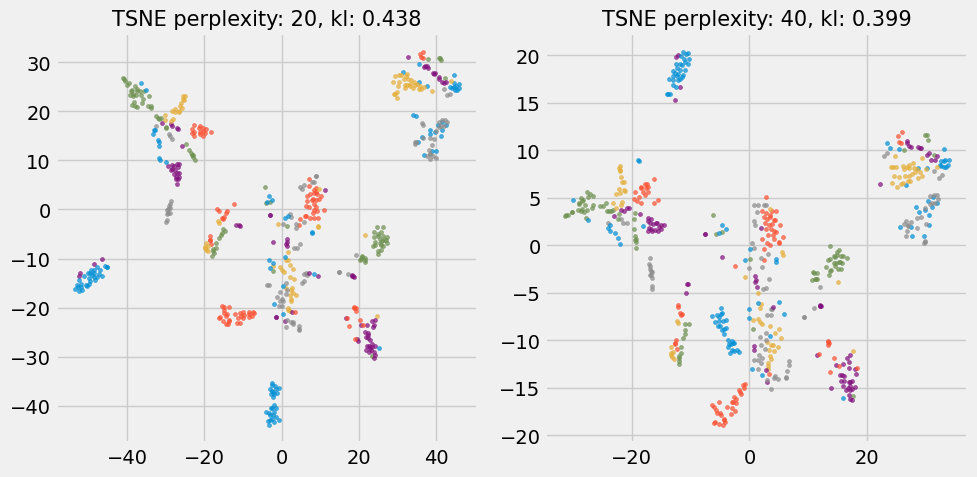

FRANKENSTEIN


Convert graph to singleton: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 4337/4337 [00:00<00:00, 18875.50it/s]


  0%|          | 0/2 [00:00<?, ?it/s]

ValueError: Found array with 0 feature(s) (shape=(4337, 0)) while a minimum of 1 is required by TSNE.

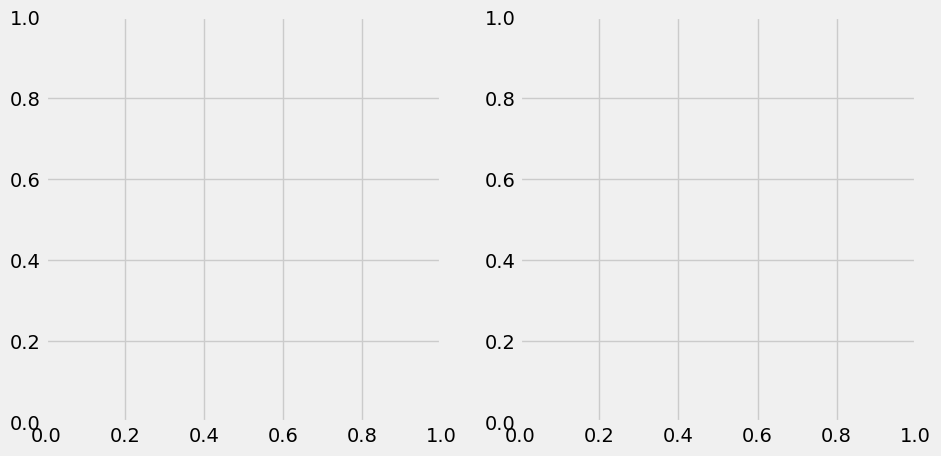

In [47]:
plt.style.use('fivethirtyeight')
import matplotlib as mpl

for dataset in datasets:
    print(dataset)
    if dataset in ["NCI-H23H"]:
        print(f"skipping {dataset}")
        continue

    graphs, labels = load_singleton_graphs_from_TUDataset(root=os.path.join('root', dataset),
                                                          dataset=dataset,
                                                          node_attr=NODE_ATTRIBUTE)

    #print("n classes", len(set(labels)))
    #print("class proportions", np.unique(labels, return_counts=True)[1] / len(labels))
    # plt.hist(labels)
    
    #print("n graphs", len(labels))
    #print("n features", graphs[0].shape)

    graphs = np.stack(graphs)
    # , 40, 60, 80
    tsne_viz(graphs, labels, s=8, perps=[20, 40], alpha=0.7)
    


In [ ]:
 plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
                    ecolor='lightgray', elinewidth=3, capsize=0)